In [56]:
#!pip3 install pandasql
#!pip3 install wordcloud
#!pip install -U spacy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql
import string
import re
import nltk
import datetime
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import spacy

# spacy.prefer_gpu()
# nlp = spacy.load("en_core_web_sm")

#nltk.download('stopwords')
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/ashish/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
rindia = pd.read_csv('all_rIndiaScrape3.csv')

In [4]:
rindia.head()

,id,title,content,is_original_content,author,flair,score,timestamp,comments_count,crossposts_count,comments,removed_by,self_posted,nsfw,is_stickied,url
0,2ywjv0,"A Tale of an old man, fiery writer, his mega a...","As asked by /u/crozyguy. Not a referenced, cit...",False,RajaRajaC,Food,141,2015-03-14 02:03:49,158,0,"Nice, waiting for more.",NaN,True,False,False,https://www.reddit.com/r/india/comments/2ywjv0...
1,3huilc,"[R] Updated Wiki, Rules & Flairs",#Comment Moderation in Political & Religious T...,False,r_india_mod,Food,33,2015-08-22 03:07:11,98,0,Nice. Also please try and do a full revision o...,NaN,True,False,False,https://www.reddit.com/r/india/comments/3huilc...
2,fyyx8c,The wealth inequality in India is truly horrif...,NaN,False,sinsandtonic,Politics,9909,2020-04-11 20:47:54,866,8,Source— https://www.thecitizen.in/index.php/en...,NaN,False,False,False,https://i.redd.it/3rol63nk35s41.jpg
3,f9outu,Fuck all Religion,"Fuck all religion. Fuck Hindusim, fuck Islam, ...",False,pking3,Politics,17898,2020-02-26 19:40:49,4192,36,We're not going to get blown out in a supernov...,NaN,True,False,False,https://www.reddit.com/r/india/comments/f9outu...
4,g4jmo6,"Nisha Jindal, with 10k FB fans, turns out to b...",NaN,False,KindlySecret8,Politics,1204,2020-04-20 14:54:52,173,0,Lmao,NaN,False,False,False,https://timesofindia.indiatimes.com/india/nish...


In [59]:
# new data frame with split value columns 
new = rindia["timestamp"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
rindia["date"]= new[0] 
  
# making separate last name column from new data frame 
rindia["time"]= new[1] 

In [60]:
rindia.info()
rindia.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2430 non-null   object 
 1   title                2430 non-null   object 
 2   content              856 non-null    object 
 3   is_original_content  2430 non-null   bool   
 4   author               2430 non-null   object 
 5   flair                2430 non-null   object 
 6   score                2430 non-null   int64  
 7   timestamp            2430 non-null   object 
 8   comments_count       2430 non-null   int64  
 9   crossposts_count     2430 non-null   int64  
 10  comments             2282 non-null   object 
 11  removed_by           0 non-null      float64
 12  self_posted          2430 non-null   bool   
 13  nsfw                 2430 non-null   bool   
 14  is_stickied          2430 non-null   bool   
 15  url                  2430 non-null   o

,score,comments_count,crossposts_count,removed_by
count,2430.000000,2430.000000,2430.000000,0.0
mean,370.685597,174.412757,0.318107,NaN
std,903.479477,519.494220,1.746738,NaN
min,0.000000,0.000000,0.000000,NaN
25%,19.000000,9.000000,0.000000,NaN
50%,76.000000,28.500000,0.000000,NaN
75%,296.000000,85.750000,0.000000,NaN
max,17898.000000,10798.000000,56.000000,NaN


In [61]:
rindia = rindia.drop_duplicates()

In [62]:
# deleting removed_by column since no posts have been removed
del rindia['removed_by']

In [63]:
# correlation between various variables
rindia.corr()

,is_original_content,score,comments_count,crossposts_count,self_posted,nsfw,is_stickied
is_original_content,1.000000,0.033941,-0.037967,0.000292,-0.055964,NaN,-0.004408
score,0.033941,1.000000,0.074332,0.563081,-0.193130,NaN,-0.007473
comments_count,-0.037967,0.074332,1.000000,0.093476,0.325447,NaN,0.073250
crossposts_count,0.000292,0.563081,0.093476,1.000000,-0.083652,NaN,-0.005228
self_posted,-0.055964,-0.193130,0.325447,-0.083652,1.000000,NaN,0.038883
nsfw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_stickied,-0.004408,-0.007473,0.073250,-0.005228,0.038883,NaN,1.000000


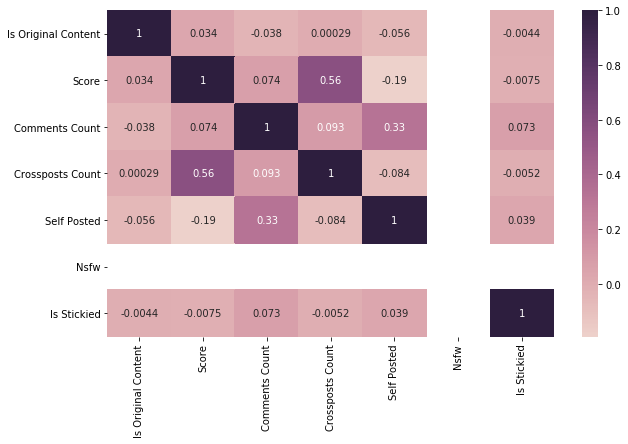

In [64]:
# heat map to visualize correlation between variables

heat_map_labels = [x.replace('_', ' ').title() for x in 
            list(rindia.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(rindia.corr(), annot=True, xticklabels=heat_map_labels, yticklabels=heat_map_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [65]:
# Statistics on several fields of interest
print ("'id' Field Overview:")
print (rindia['id'].describe(),"\n")

#print ("'parent_id' Field Overview:")
#print (rindia['parent_id'].describe(),"\n")

print ("'title' Field Overview:")
print (rindia['title'].describe(),"\n")

print ("'author' Field Overview:")
print (rindia['author'].describe(),"\n")

print ("'flair' Field Overview:")
print (rindia['flair'].describe(),"\n")

#print "'subreddit' Field Overview:"
#print rindia['subreddit'].describe(),"\n"

print ("'score' Field Overview:")
print (rindia['score'].describe())

'id' Field Overview:
count       2430
unique      2428
top       3huilc
freq           2
Name: id, dtype: object 

'title' Field Overview:
count                                      2430
unique                                     2308
top       Late Night Random Discussion Thread !
freq                                        117
Name: title, dtype: object 

'author' Field Overview:
count          2430
unique         1241
top       oxythebot
freq            237
Name: author, dtype: object 

'flair' Field Overview:
count          2430
unique           11
top       Scheduled
freq            250
Name: flair, dtype: object 

'score' Field Overview:
count     2430.000000
mean       370.685597
std        903.479477
min          0.000000
25%         19.000000
50%         76.000000
75%        296.000000
max      17898.000000
Name: score, dtype: float64


In [66]:
rindia.isnull().sum()

id                        0
title                     0
content                1574
is_original_content       0
author                    0
flair                     0
score                     0
timestamp                 0
comments_count            0
crossposts_count          0
comments                148
self_posted               0
nsfw                      0
is_stickied               0
url                       0
date                      0
time                      0
dtype: int64

Plotting the frequency distribution of flairs over all posts

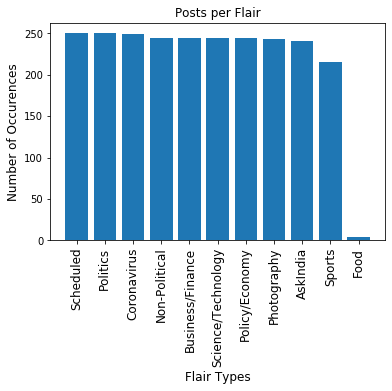

In [67]:
# flair count
num_flair = rindia.flair.value_counts()

# Plotting posts per flair

plt.bar(num_flair.index,num_flair)
plt.title("Posts per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

Plotting the distribution of adult content

Content Marked as NSFW - over 18 age: False    2430
Name: nsfw, dtype: int64


[Text(0.5, 0, 'Adult content'), Text(0.5, 1.0, 'Distribution of Conetent')]

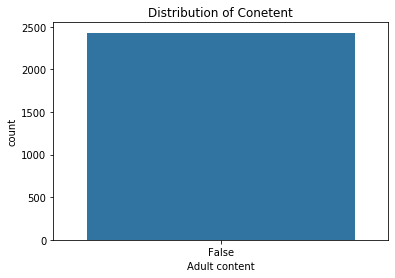

In [68]:
# Getting the count of content marked as nsfw i.e. content over 18 age
nsfw_count = rindia['nsfw'].value_counts()
print("Content Marked as NSFW - over 18 age:",nsfw_count)

# Plotting count of adult content
fig, ax = plt.subplots()
sns.countplot(rindia.nsfw)
ax.set(xlabel='Adult content', title='Distribution of Content')

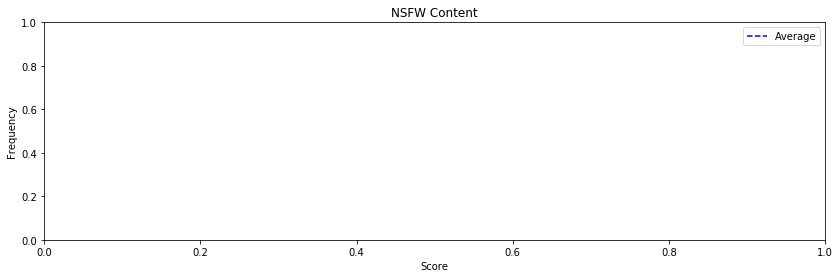

In [69]:
#(rindia[rindia['nsfw'] == True]['id'].count() / rindia.shape[0] ) * 100
nsfw_avg = rindia[rindia['nsfw'] == True]['score'].mean()
fig, ax0 = plt.subplots(sharey=True, figsize=(14,4))
sns.kdeplot(rindia[rindia['nsfw'] == True]['score'], ax=ax0, color='black', label='Score')
ax0.set(xlabel='Score', title='NSFW Content', ylabel='Frequency')
ax0.axvline(x=nsfw_avg, label='Average', linestyle='--', color='blue')
ax0.legend()

The graph shows no occurence of NSFW content. 

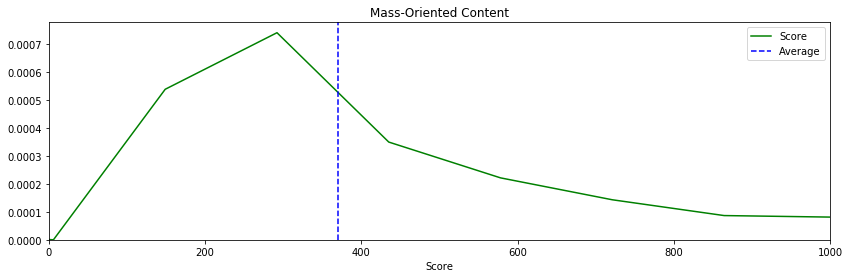

In [70]:
mass_avg = rindia[rindia['nsfw'] == False]['score'].mean()
fig, ax1 = plt.subplots(sharey=True, figsize=(14,4))
sns.kdeplot(rindia[rindia['nsfw'] == False]['score'], ax=ax1, color='green', label='Score')
ax1.set(xlim=(0,1000), xlabel='Score', title='Mass-Oriented Content')
ax1.axvline(x=mass_avg, label='Average', linestyle='--', color='blue')
ax1.legend() 

In [71]:
# authors with maximum posts
top_authors = rindia.query('author != "[deleted]"')['author'].value_counts().reset_index()
top_authors.head(5)

,index,author
0,oxythebot,237
1,hipporama,37
2,Neglectedsince1994,37
3,sudden_dust,31
4,Dumma1729,30


In [72]:
# all-time top authors
(rindia.query('author != "[deleted]"').
 groupby('author')['score'].sum().
 reset_index().sort_values(by='score', ascending=False).head()
)

,author,score
1113,sudden_dust,40082
266,Neglectedsince1994,38476
950,pking3,17898
149,Gavthi_Batman,14301
1218,wordswithmagic,12590


In [73]:
# all time top rated posts
rindia[['title', 'score', 'author', 'timestamp']].sort_values(by='score', ascending=False).head()

,title,score,author,timestamp
3,Fuck all Religion,17898,pking3,2020-02-26 19:40:49
2206,Today's The Hindu,11020,constantinopleF,2020-03-22 16:20:29
2,The wealth inequality in India is truly horrif...,9909,sinsandtonic,2020-04-11 20:47:54
2186,Two NE student in Karnataka were not allowed t...,8010,sharan480,2020-03-29 16:34:14
2196,"""Elders Must Be Respected In Group""",7513,deadbroccoli,2020-03-21 16:12:03


In [74]:
# posts with most number of comments
rindia[['title', 'comments_count', 'author', 'timestamp']].sort_values(by='comments_count', ascending=False).head()

,title,comments_count,author,timestamp
2181,Coronavirus (COVID-19) Megathread - News and U...,10798,IAmMohit,2020-03-29 08:40:33
2183,Coronavirus (COVID-19) Megathread - News and U...,10790,IAmMohit,2020-03-19 07:23:27
2231,COVID-19 Megathread - News and Updates,5570,IAmMohit,2020-02-12 16:29:51
3,Fuck all Religion,4192,pking3,2020-02-26 19:40:49
253,Late Night Random Discussion Thread !,3362,oxythebot,2020-04-09 05:15:11


In [75]:
rindia['created_loc_time'] = pd.to_datetime(rindia['timestamp'])

In [76]:
rindia['created_loc_time'].sort_values(ascending=True).head()

0      2015-03-14 02:03:49
1934   2015-03-14 02:03:49
1      2015-08-22 03:07:11
1935   2015-08-22 03:07:11
1423   2019-04-07 16:52:44
Name: created_loc_time, dtype: datetime64[ns]



Average Number of Comments: 25.11392405063291 



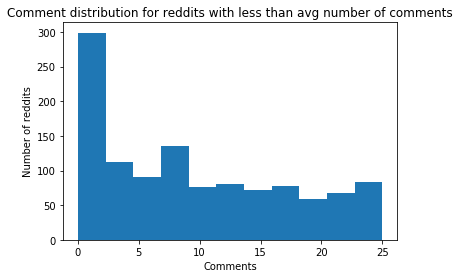

In [77]:
# comment distribution for reddits with less than average number of comments
comment_avg = rindia[rindia['comments_count'] == True]['score'].mean()
print("\n")
print("Average Number of Comments:",comment_avg,"\n")

fig, ax = plt.subplots()
_ = sns.distplot(rindia[rindia["comments_count"] < comment_avg]["comments_count"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="comments_count", ylabel="id")
plt.title("Comment distribution for reddits with less than avg number of comments")
plt.ylabel("Number of reddits")
plt.xlabel("Comments")
plt.show()

In [78]:
# authors with most number of comments
rindia[['author','comments_count']].sort_values(by='comments_count', ascending=False).head()

,author,comments_count
2181,IAmMohit,10798
2183,IAmMohit,10790
2231,IAmMohit,5570
3,pking3,4192
253,oxythebot,3362


In [79]:
# authors with most number of comments_count = 
self_posted_count = rindia['self_posted'].sum()
self_posted_count
#rindia[['author','self_posted']].sort_values(by='self_posted', ascending=False).head(50)

857

In [80]:
# Count the number of authors with at least a certain number of threshold comments
author_data = rindia.groupby(rindia.author)

author_count = []
comment_count = []
comment_threshold_count = [0,1,5,10,20,50,100,200,300,400,500,600]

for count in comment_threshold_count:
    num_authors = author_data.filter(lambda x: len(x) > count).apply(pd.Series.nunique)['author']
    num_comments = author_data.filter(lambda x: len(x) > count).apply(pd.Series.nunique)['id']
    
    author_count.append(num_authors)
    comment_count.append(num_comments)

/home/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<Figure size 432x288 with 0 Axes>

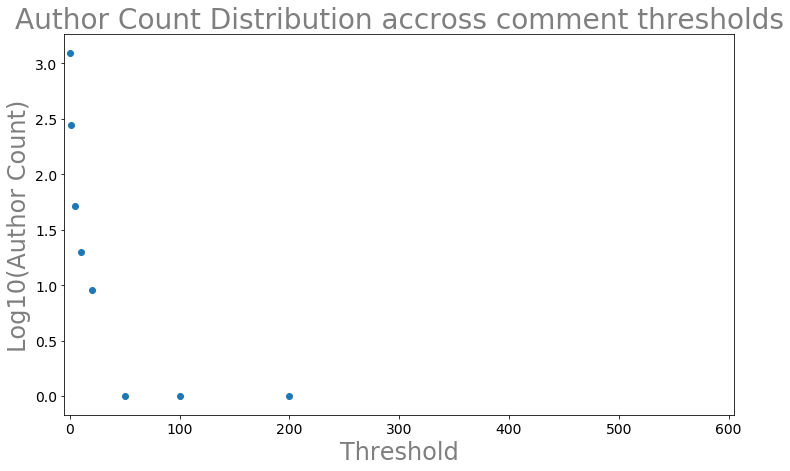

In [81]:
# Number of authors at various comment thresholds

# Seaborn plot traits
sns.despine()
fig, ax = plt.subplots()
plt.scatter(x=comment_threshold_count, y=np.log10(author_count))
ax.set_xlim([-5,605])
ax.set_title('Author Count Distribution accross comment thresholds', fontsize=28,color="black",alpha=0.5)
ax.set_xlabel("Threshold",size = 24,color="black",alpha=0.5)
ax.set_ylabel("Log10(Author Count)",size = 24,color="black",alpha=0.5)
ax.tick_params(labelsize=14,labelcolor="black")
fig.set_size_inches(12,7)

In [82]:
# Calculate the Percent of Comments Contributed by Various Percent of Total Authors
total_authors = author_data.filter(lambda x: len(x) > 0).apply(pd.Series.nunique)['author']
total_comments = len(rindia)

percent_author = [100]
for count in author_count:
    percent = 100 * count / float(total_authors)
    percent_author.append(percent)

percent_comments = [100]
for count in comment_count:
    percent = 100 * count / float(total_comments)
    percent_comments.append(percent)

<Figure size 432x288 with 0 Axes>

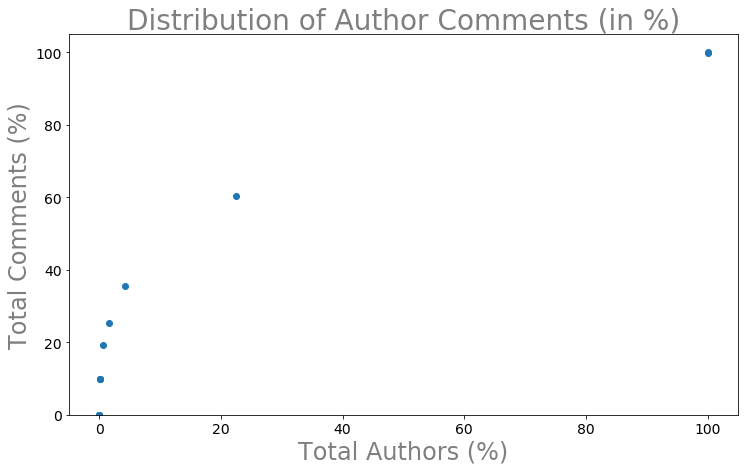

In [83]:

# Seaborn plot traits
sns.despine()
fig, ax = plt.subplots()
plt.scatter(percent_author,percent_comments)
ax.set_xlim([-5,105])
ax.set_ylim([0,105])
ax.set_title('Distribution of Author Comments (in %)', fontsize=28,color="black",alpha=0.5)
ax.set_xlabel("Total Authors (%)",size = 24,color="black",alpha=0.5)
ax.set_ylabel("Total Comments (%)",size = 24,color="black",alpha=0.5)
ax.tick_params(labelsize=14,labelcolor="black")
fig.set_size_inches(12,7)

In [84]:
# adding synthetic feature - comment length
rindia['comment_length'] = rindia['comments'].str.len()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

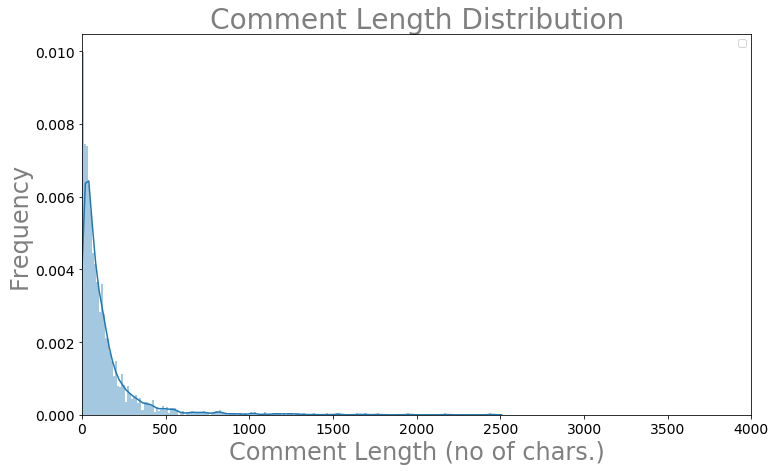

In [85]:
x = rindia.comment_length
sns.despine()
fig, ax = plt.subplots()
sns.distplot(x, bins=200,ax=ax)
ax.set_xlim([0,4000])
ax.set_title('Comment Length Distribution', fontsize=28,color="black",alpha=0.5)
ax.set_xlabel("Comment Length (no of chars.)",size = 24,color="black",alpha=0.5)
ax.set_ylabel("Frequency",size = 24,color="black",alpha=0.5)
ax.tick_params(labelsize=14,labelcolor="black")
ax.legend()

fig.set_size_inches(12,7)

In [86]:
flair_comment_count = rindia.groupby('flair',sort=True)['comments_count'].sum()

In [87]:
print(flair_comment_count)

flair
AskIndia                9853
Business/Finance        5270
Coronavirus            56297
Food                     512
Non-Political          20272
Photography             5209
Policy/Economy          7756
Politics               29598
Scheduled             280806
Science/Technology      4557
Sports                  3693
Name: comments_count, dtype: int64


In [88]:
flair_label = []
comment_count = []
for x,y in flair_comment_count.items():
    flair_label.append(x)
    comment_count.append(y)

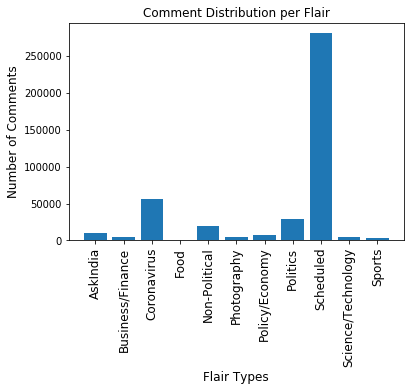

In [89]:
# plotting graph to visualize comment distribution per flair

plt.bar(flair_label,comment_count)
plt.title("Comment Distribution per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of Comments',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

In [90]:
flair_score_count = rindia.groupby('flair',sort=True)['score'].sum()

In [91]:
print(flair_score_count)

flair
AskIndia               16765
Business/Finance       29053
Coronavirus           252603
Food                     346
Non-Political         183041
Photography            94295
Policy/Economy         46416
Politics              198508
Scheduled               7636
Science/Technology     24536
Sports                 47567
Name: score, dtype: int64


In [92]:
flair_label = []
score_count = []
for x,y in flair_score_count.items():
    flair_label.append(x)
    score_count.append(y)

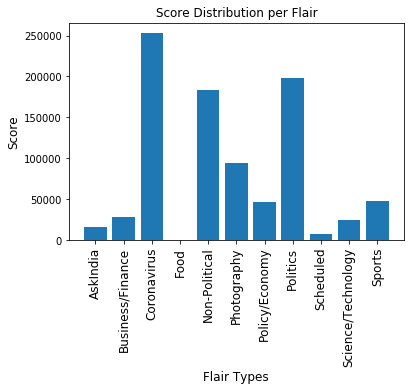

In [93]:
# plotting graph to visualize score distribution per flair

plt.bar(flair_label,score_count)
plt.title("Score Distribution per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

In [94]:
X=rindia['title']

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
#print (processed_tweets)

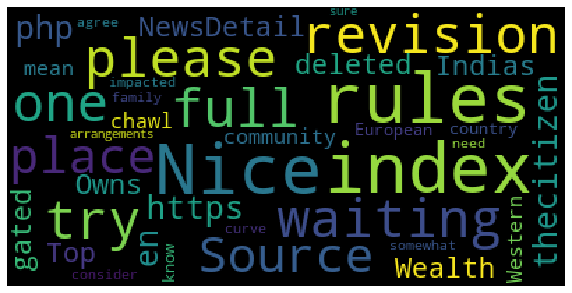

In [95]:


text = rindia['comments'].values 

wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(str(text))
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('comment_wordcloud.png', facecolor='k', bbox_inches='tight')

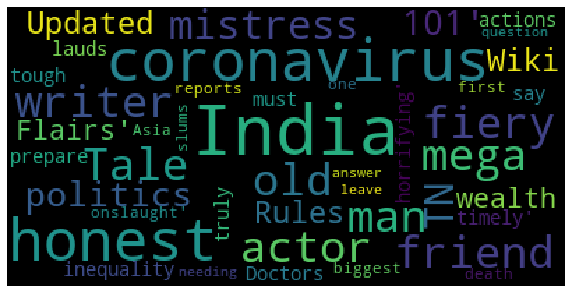

In [96]:
text = rindia['title'].values 

wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(str(text))
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('title_wordcloud.png', facecolor='k', bbox_inches='tight')

In [97]:
# text = rindia['content'].values 
# wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="black").generate(str(text))
# plt.figure(figsize = (10, 10), facecolor = None) 
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()
# plt.savefig('content_wordcloud.png', facecolor='k', bbox_inches='tight')